### **Haberman’s data Description**

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital 
between year 1958 to 1970 for the patients who undergone surgery of breast cancer.
source : https://www.kaggle.com/gilsousa/habermans-survival-data-set

Attribute Information:
* Age of patient at time of operation (numerical)
* Year in which patient was undergone surgery (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical) https://en.wikipedia.org/wiki/Lymph_node
* Survival status (class attribute)
    * 1 = the patient survived 5 years or longer
    * 2 = the patient died within 5 year

### objective
Classify a new patient as belonging to one of the 2 classes given the 3 features. 

### **Environment Configuration**

In [1]:
import os
print(os.listdir('../input/habermans-survival-data-set'))

['haberman.csv']


In [2]:
# Importing necessary librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing the data in to the pandas dataframe and looking at the first few data points
data = pd.read_csv('../input/habermans-survival-data-set/haberman.csv')
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### **Data Preparation**

In [4]:
# It seems that the columns names are not specified correctly so lets name the columns
data.rename(columns={"30": "Age", "64": "Op_year", "1":"axil_nodes", "1.1":"Surv_status"}, inplace = True)
data.head()

,Age,Op_year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
# now for our convenience let's change the class labels name
data['Surv_status'] = data['Surv_status'].map({1:'Survived_more', 2:'Survived_less'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          305 non-null    int64 
 1   Op_year      305 non-null    int64 
 2   axil_nodes   305 non-null    int64 
 3   Surv_status  305 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [7]:
# How many data points for each class are present
data['Surv_status'].value_counts()

Survived_more    224
Survived_less     81
Name: Surv_status, dtype: int64

#### observations:
* There are 305 patients record in the dataset (305 data instances)
* Three features of integer type where captured form each patients.
* One feature of object type has two classes.
* As one class dominates other class the dataset is imblanced.
* There are No missing values in the dataset.
* There were 224 patients out of 305 who survived more than 5 years and only 81 patients survived less than 5 years  

### **High Level Statistics**

In [8]:
data.describe()

,Age,Op_year,axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


#### observations:
* Age ranges from 30 to 83 years with mean of 52.53 and standard deviation of 10.744
* axil_nodes ranges from 0 to 52 years with mean of 4.36 and standard deviation of 7.1993 

### Bivarient analysis (Selecting relevant features)

lets do analysis on those features which has an affects on classification of patients. 
we will ues pairplot which will give us combination of plots for all features in our dataset
then we will select best combination plot for our analysis.  

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


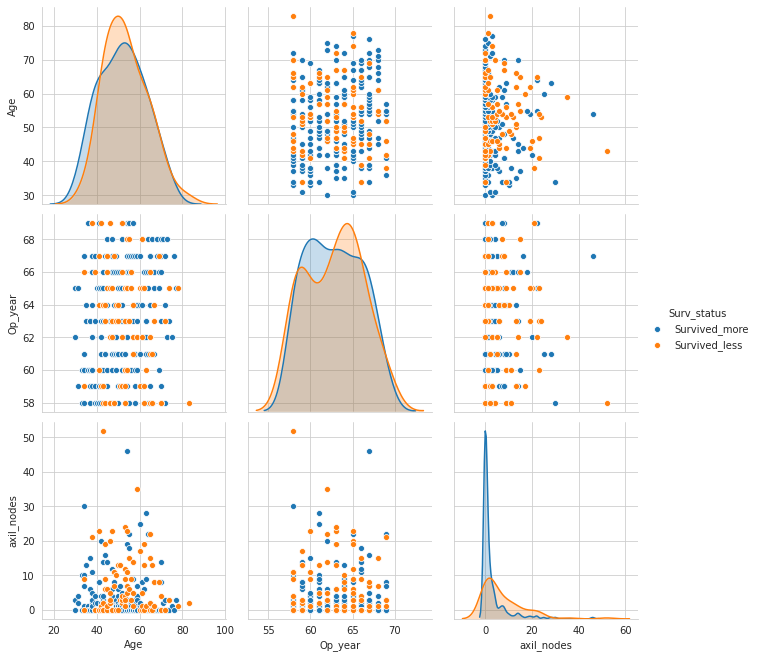

In [9]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Surv_status", size=3);
plt.show()

#### observations:
* Plot No. 3 consisting of axil_nodes and Age is the only plot where the data points for survived_more and survived_less is more        distinguishable as compared to other plots where the data points are overlapping  

Lets divide the data in to two dataframes one for each class label.  

In [10]:
survived_more  = data.loc[data['Surv_status']=='Survived_more']
survived_less  = data.loc[data['Surv_status']=='Survived_less']

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


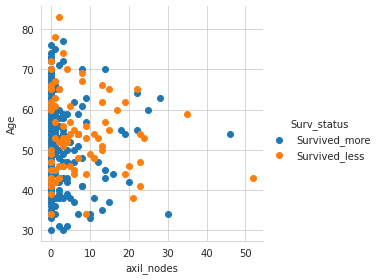

In [11]:
# we will be focusing on the features of this plot

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Surv_status", size=4) \
   .map(plt.scatter, "axil_nodes", "Age") \
   .add_legend();
plt.show();

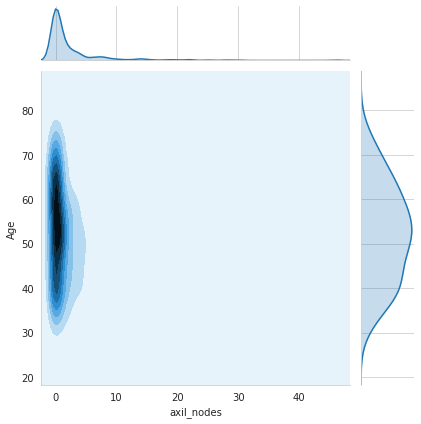

In [12]:
# contour plot to visualize the concentration of datapoints for patients who survived more then 5 years after surgery
sns.jointplot(x="axil_nodes", y="Age", data=survived_more, kind="kde")
plt.show()

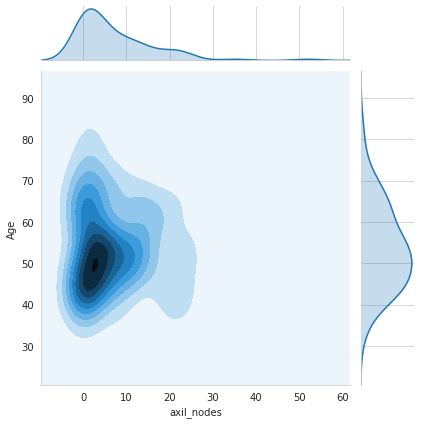

In [13]:
# contour plot to visualize the concentration of datapoints for patients who survived less then 5 years after surgery
sns.jointplot(x="axil_nodes", y="Age", data=survived_less, kind="kde")
plt.show()

#### observations:
* The people who survived more then 5 years has data points more concentrated along zero for axil_nodes.
* The people who survived less then 5 years has more spread along axil_node axis.

### **Univarient  Analysis of Age and  axil_nodes**

#### Histogram and PDF of Age and axil_nodes

PDF of Age

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


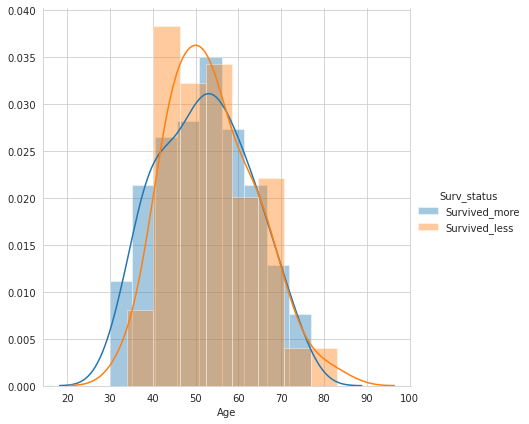

In [14]:
sns.FacetGrid(data, hue="Surv_status", size=6) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

visualizing high level statistics with Box Plot for Age

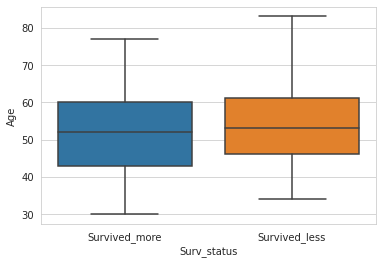

In [15]:
sns.boxplot(x = 'Surv_status',y = 'Age', data = data)
plt.show()

#### observations:
* The people who survived more and survived less had Age ranging between 30 years and 85 so its hard to distinguish the two category of people on the bases of Age   

PDF of axil_nodes

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


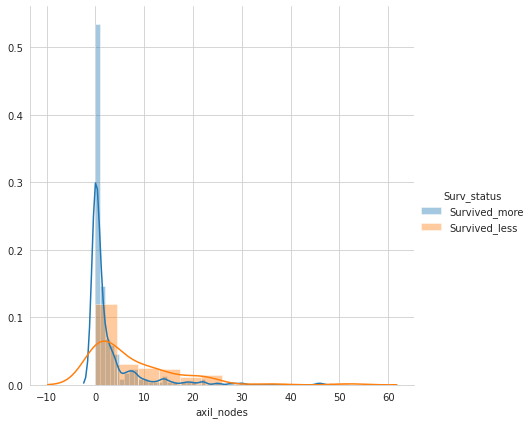

In [16]:
sns.FacetGrid(data, hue="Surv_status", size=6) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

visualizing high level statistics with Box Plot for axil_nodes

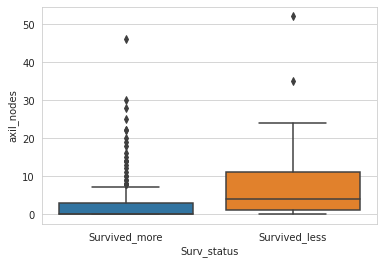

In [17]:
sns.boxplot(x = 'Surv_status',y = 'axil_nodes', data = data)
plt.show()

#### observations:
* It Seems that people with axil_nodes in the range of 0 to 3 has higher chance of survival as compared to people with high axil_nodes but its hard to quantify what proportion of people are surviving or dying

#### Let's quantify the results with the help of CDF

For each dataframe created we will plot PDF and an associated CDF. 

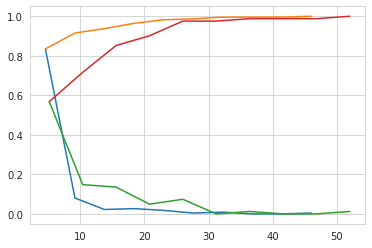

In [18]:
counts, bin_edges = np.histogram(survived_more['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survived_less['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

The orange line represents CDF for people who survived more then 5 years after surgery  and the respective blue line represents 
PDF for same. 
and the Red line represents CDF for people who survived less then 5 years after surgery  and the respective green line represents 
PDF for same

#### observations:
* Around 85% of people who survived more than 5 years had axil_nodes less then or equal to 3.5
* Arround 55% of people who survived less than 5 years had axil nodes less then or equal to 3.5

###  **Conclusion** 
Patients in the Haberman's Survival dataset can be classified with a basic if-else condition applied on features and with the help of basic Explorator Data Analysis techniques  